In [90]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [122]:
zri = pd.read_csv('./data/high_pop.csv', index_col=0)

In [123]:
zri.shape

(66155, 45)

In [124]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [125]:
# zri['withdegree'] = zri['bachelors_degree'] + zri['masters_degree']
# zri['withdegree'] = zri.withdegree.fillna(0)
# zri['hasdegree'] = np.where(zri['withdegree'] >0, 1, 0)
# zri['hasdegree'].value_counts()

In [126]:
zri['AGIncome'] = (zri['AGIncome']*1000)/zri['total_pop']
zri['TotIncome'] = (zri['TotIncome']*1000)/zri['total_pop']
zri['SalariesWages'] = (zri['SalariesWages']*1000)/zri['total_pop']
zri['NumUnemply'] =(zri['NumUnemply']*1000)/zri['total_pop']
zri['TotTaxes'] = (zri['TotTaxes']*1000)/zri['total_pop']

In [127]:
#remove outliers
#zri = zri[(zri.value < 3433.18)]
# zri.income_per_capita = zri.income_per_capita.fillna(0)
# zri.TotTaxes = zri.TotTaxes.fillna(0)
# zri = zri[(zri.income_per_capita < 85180.28)]
# zri = zri[(zri.TotTaxes < 2531.24)]
zri.income_change = zri.income_change.fillna(0)


In [128]:
# #Log Transformation:
zri['LogValue'] = np.log(zri.value)
zri['LogTotTaxes'] = np.log(zri.TotTaxes)
zri['Logincome_per_capita'] = np.log(zri.income_per_capita)

# zri['LogTotIncome'] = np.log(zri.TotIncome)
# zri['LogSalariesWages'] = np.log(zri.SalariesWages)
# zri['Logmedian_age'] = np.log(zri.median_age)
# zri['LogAGIncome'] = np.log(zri.AGIncome)
# zri['Loggini_index'] = np.log(zri.gini_index)
# zri['Logpopulation_change'] = np.log(zri.population_change)


In [150]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'LogValue' : 'LogValue_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','LogValue']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].rename(columns = {'LogValue' : 'LogValue_2016'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','LogValue']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [151]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
        'Month','Year','Labor\nForce','Employed', 'Unemployed',\
        'Year-Month', 'FIPSCode', 'geo_id',\
        'value', 'year', 'TotTaxes', 'income_per_capita'] #'ZIPCODE'

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

# print(test.columns)
# train.columns

In [152]:
train.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [153]:
train = train.dropna(subset=['LogValue'])

In [154]:
X_train = train.drop(columns = ['LogValue'])
y_train = train['LogValue']

In [155]:
test.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [156]:
test = test.dropna(subset=['LogValue'])

In [157]:
X_test = test.drop(columns = ['LogValue'])
y_test = test['LogValue']

In [158]:
#show columns with missing values
print(X_train.columns[X_train.isnull().any()])
print(X_test.columns[X_test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [159]:
X_train.columns

Index(['ZIPCODE', 'total_pop', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index',
       'vacant_housing_units_for_rent', 'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'rental_units_supply', 'population_change', 'income_change',
       'supply_change', 'natural_amenity_rank', 'education', 'LogValue_2015',
       'LogTotTaxes', 'Logincome_per_capita'],
      dtype='object')

In [160]:
X_train.shape

(7954, 32)

In [161]:
X_test.shape

(7847, 32)

In [162]:
#feature selection
model_cols = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90',
       'black_pop', 'asian_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']

model_cols2 = ['LogValue_2016', 'Season', 'LogTotTaxes',
       'MortDeliq90',
       'black_pop', 'asian_pop', 
       'vacant_housing_units_for_rent',
    'natural_amenity_rank']

X_train = X_train[model_cols]

X_test = X_test[model_cols2]


In [147]:
#feature selection
model_cols = ['LogValue_2015', 'black_pop', 'asian_pop',
       'vacant_housing_units_for_rent', 'natural_amenity_rank']

model_cols2 = ['LogValue_2016', 'black_pop', 'asian_pop',
       'vacant_housing_units_for_rent', 'natural_amenity_rank']

X_train = X_train[model_cols]

X_test = X_test[model_cols2]


## Model Generation

In [163]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import model_selection

In [167]:
lm = LinearRegression()

lm.fit(X_train, y_train)

print("Train Score: %.4f" % lm.score(X_train, y_train))
print("Test Score:  %.4f" % lm.score(X_test, y_test))

print(lm.score(X_train, y_train)- lm.score(X_test, y_test))



Train Score: 0.9608
Test Score:  0.9503
0.010480919635710517


In [27]:
lm.intercept_, lm.coef_

(0.5771163630115916,
 array([ 0.90591976,  0.00368616,  0.00572486,  0.01352243,  0.06863593,
         0.08206178, -0.28499529,  0.0293134 ]))

In [159]:
X_train.columns

Index(['LogValue_2015', 'black_pop', 'asian_pop',
       'vacant_housing_units_for_rent', 'natural_amenity_rank'],
      dtype='object')

In [121]:
from sklearn.model_selection import cross_val_score
print(np.sqrt(-1* cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[0.07181048 0.06977376 0.06754739 0.06873429 0.07141826]


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

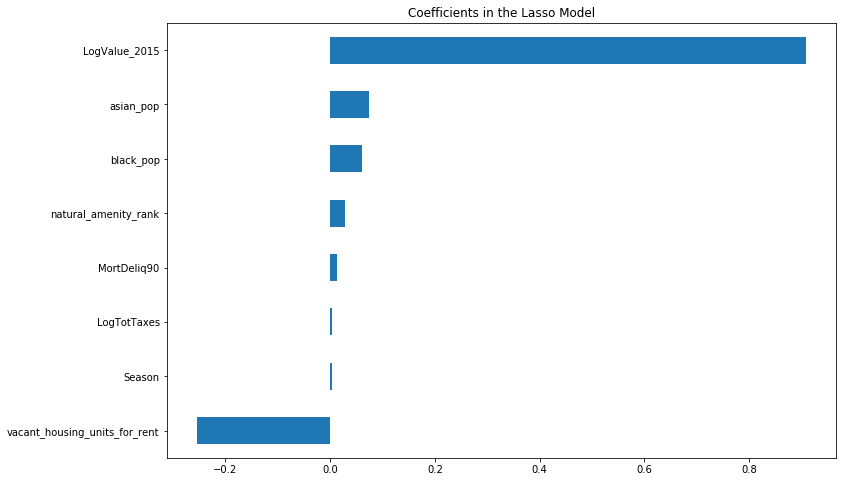

In [168]:
# param_grid={'alpha': np.logspace(-5, -3, 100)}
# grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Cross Validation")
# print("-" * 20)
# print("Best parameter: ", grid_search.best_params_)
# print("Best CV score:  %.4f" % grid_search.best_score_)

# alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = 1e-05, normalize=True).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (12, 8))
plt.title("Coefficients in the Lasso Model")

In [169]:
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

0.9607228948887742


0.9503912667844014

In [30]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,96.8,LogValue_2015
1,7.0,Season
2,41.1,LogTotTaxes
3,7.3,MortDeliq90
4,2.1,black_pop
5,2.1,asian_pop
6,4.5,vacant_housing_units_for_rent
7,13.5,natural_amenity_rank


In [210]:
#Q-Q plot for normality
#fig4=sm.qqplot(reg1.resid, line='r')

In [69]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-10,1,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

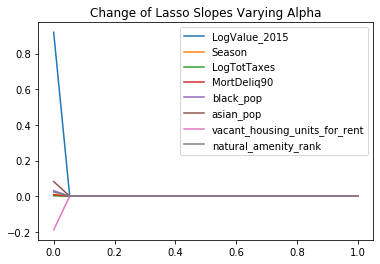

In [70]:
coefs = pd.DataFrame(np.array(coefs), columns=X_train.columns)
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=0)
plt.title('Change of Lasso Slopes Varying Alpha')

In [ ]:
X_train.head()

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train.head()

In [ ]:
X_train.columns = X_train.columns.to_series().apply(lambda x: x.strip())

In [ ]:
X_train.reset_index(drop = True, inplace = True)

In [ ]:
X_train.head()

In [ ]:
y_train.reset_index(drop = True, inplace = True)

In [349]:
# import pandas as pd
# import statsmodels.api as sm

# def forward_regression(X, y,
#                        initial_list=[], 
#                        threshold_in=0.01, 
#                        threshold_out = 0.05, 
#                        verbose=True):
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         # forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.argmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add   with p-value '.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

# forward_regression(X_train, y_train)

In [71]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

['LogValue_2015',
 'Season',
 'LogTotTaxes',
 'MortDeliq90',
 'black_pop',
 'asian_pop',
 'vacant_housing_units_for_rent',
 'natural_amenity_rank']

In [72]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = X_train
y = y_train
names=pd.DataFrame(X_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,1
1,3
2,4
3,2
4,1
5,1
6,1
7,1


In [73]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                         Feature  Rank
0                  LogValue_2015     1
4                      black_pop     1
5                      asian_pop     1
6  vacant_housing_units_for_rent     1
7           natural_amenity_rank     1


5

In [702]:
#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod =  RFECV(lin_reg, step=1, cv=300) #RFE(lin_reg, 4, step=1)

myvalues=rfe_mod.fit(X,y) #to fit

In [74]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

# load data
X = X_train
y = y_train
names=pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(X, y)

print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score']).head(13)

#We can now rank the importance of each feature based on their score.  
#The higher the score, the more important the variable. 

[3.45012927e+05 3.11236124e+00 5.91101022e+03 2.62798039e+01
 5.78443956e+02 3.60792121e+03 3.22180165e+03 1.88411230e+03]


,Feature,Score
1,Season,3.112361
3,MortDeliq90,26.279804
4,black_pop,578.443956
7,natural_amenity_rank,1884.112298
6,vacant_housing_units_for_rent,3221.801648
5,asian_pop,3607.921205
2,LogTotTaxes,5911.010224
0,LogValue_2015,345012.926535


In [76]:
#create a single data frame with both features and target by concatonating
train_df=pd.concat([X_train, y_train], axis=1)
train_df.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,LogValue
0,7.421776,2,6.350867,3.00000,0.026682,0.071471,0.053914,3.0,7.458763
2,7.036148,2,6.229107,2.17876,0.062797,0.155716,0.030479,3.0,7.101676
3,7.507690,2,6.965521,3.00000,0.043573,0.057157,0.028165,3.0,7.515345
4,6.858565,2,4.276235,2.10000,0.015401,0.009632,0.069657,5.0,6.800170
5,7.243513,2,5.445087,3.00000,0.192627,0.104966,0.067138,3.0,7.288244


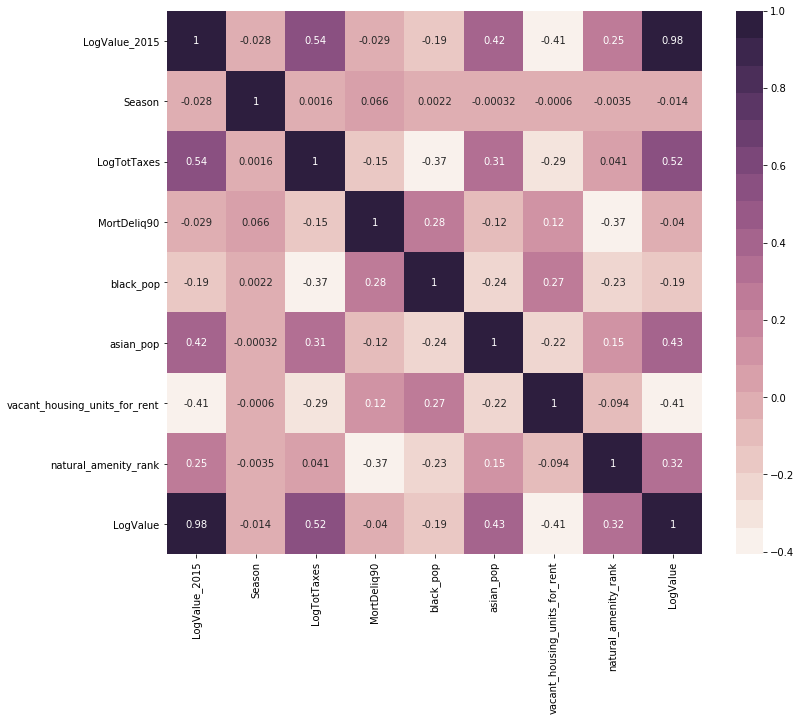

In [77]:
#Visualize corelations
import seaborn as sns
plt.figure(figsize=(12,10))
ax=sns.heatmap(train_df.corr(), annot=True, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))
ax.xaxis.tick_top
plt.show()

In [26]:
train_df.head()

,LogValue_2015,Season,LogTotTaxes,Unemploy-\nment Rate\n(%),MortDeliq90,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,Logincome_per_capita,vacant_housing_units_for_rent,population_change,natural_amenity_rank,education,LogValue
0,7.421776,2,6.350867,6.2,3.00000,30.9,0.815625,0.026682,0.071471,0.060639,0.5041,11.084002,0.053914,1.659193,3.0,1.828814,7.458763
2,7.036148,2,6.229107,4.3,2.17876,34.4,0.581662,0.062797,0.155716,0.173303,0.3454,10.767516,0.030479,120.653315,3.0,1.264326,7.101676
3,7.507690,2,6.965521,6.2,3.00000,30.1,0.804186,0.043573,0.057157,0.066750,0.5235,11.163567,0.028165,13.406101,3.0,1.693632,7.515345
4,6.858565,2,4.276235,5.2,2.10000,31.2,0.111496,0.015401,0.009632,0.853346,0.4264,9.978920,0.069657,3.742130,5.0,0.659715,6.800170
5,7.243513,2,5.445087,6.2,3.00000,37.4,0.542195,0.192627,0.104966,0.122316,0.5263,10.564266,0.067138,11.424755,3.0,1.471915,7.288244


In [688]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name


Index(['masters_degree', 'LogValue_2015'], dtype='object')

In [689]:
n_features = sfm.transform(X).shape[1]
n_features

2

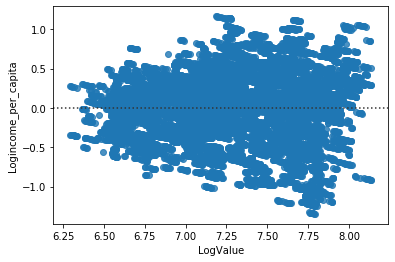

In [170]:
lm.fit(X_train, y_train)

print('Linear Model')
print('-'*20)
print("Train Score:   %.5f" % lm.score(X_train, y_train))
print("Test Score:    %.5f\n" % lm.score(X_test, y_test))

Linear Model
--------------------
Train Score:   0.96078
Test Score:    0.95030



In [171]:
lasso = Lasso(alpha = 1e-05, normalize=True).fit(X_train, y_train)

print('Penalized Linear Model')
print('-'*20)
print("Train Score: %.5f" % lasso.score(X_train, y_train))
print("Test Score:  %.5f" % lasso.score(X_test, y_test))

Penalized Linear Model
--------------------
Train Score: 0.96072
Test Score:  0.95039


In [172]:
from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

    
print("R^2 Score:  %.2f" % (100*lm.score(X_train, y_train)))
print("Mean Error: $%.0f\n" % mean_squared_error(y_test, y_pred))


Final Model
--------------------
R^2 Score:  96.08
Mean Error: $0



In [173]:
residuals = pd.DataFrame(y_test - y_pred)

In [174]:
len(residuals.loc[abs(residuals['LogValue']) > 0.4])

22

In [175]:
residuals.loc[abs(residuals['LogValue']) > 0.4].index

Int64Index([1221, 1942, 2664, 3375, 4093, 5152, 5166, 5505, 5533, 5639, 5728,
            5868, 5882, 6218, 6245, 6350, 6438, 6582, 6596, 6930, 7650, 7782],
           dtype='int64')

In [176]:
largeres = test.loc[[1221, 1942, 2664, 3375, 4093, 5152, 5166, 5505, 5533, 5639, 5728,\
           5868, 5882, 6218, 6245, 6350, 6438, 6582, 6596, 6930, 7650, 7782], :]


In [177]:
largeres.head(1)

,ZIPCODE,total_pop,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,vacant_housing_units_for_rent,housing_units_renter_occupied,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,rental_units_supply,population_change,income_change,supply_change,natural_amenity_rank,education,LogValue_2016,LogTotTaxes,Logincome_per_capita,LogValue
1221,13021,38756.0,2.0,4261.86913,4317.374514,2966.538514,3.526336,5.1,2.222719,2.476181,42.5,0.903989,0.046341,0.005548,0.015662,0.4387,0.042682,6482.0,27.4,0.164465,0.107777,0.100243,0.056043,6771.0,23.653944,-0.363247,28.567686,3.0,0.904918,7.293018,5.420418,10.222523,6.796824


In [178]:
largeres.ZIPCODE.value_counts()

13021    7
91770    4
90201    3
91732    3
90706    3
91733    2
Name: ZIPCODE, dtype: int64

In [179]:
zipcodes = [13021, 91770, 90201, 91732, 90706, 91733]

In [182]:
#largeres.groupby('Year').agg({'value':'mean'}).plot()

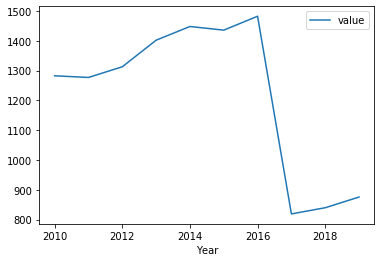

In [85]:
zipZRI = zri[zri.ZIPCODE == 13021]
zipZRI.groupby('Year').agg({'value':'mean'}).plot()

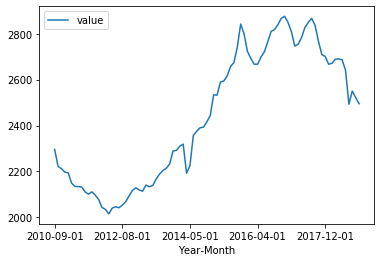

In [78]:
zipZRI = zri[zri.ZIPCODE == 90201]
zipZRI.groupby('Year-Month').agg({'value':'mean'}).plot()

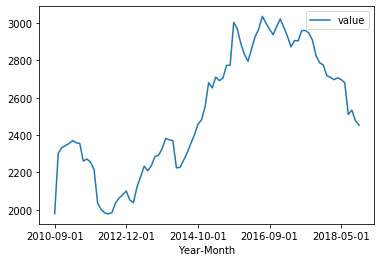

In [79]:
zipZRI = zri[zri.ZIPCODE == 91732]
zipZRI.groupby('Year-Month').agg({'value':'mean'}).plot()

In [183]:
train_set = pd.concat([X_train, y_train], axis=1)

In [184]:
y = train_set['LogValue']
x = train_set.drop('LogValue', axis=1)

In [185]:
from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(x, y)
print("R^2 Score:  %.2f" % (100*lm.score(x, y)))
print("Mean Error: $%.0f\n" % mean_squared_error(expo(y), expo(lm.predict(x)), squared=False))

Final Model
--------------------
R^2 Score:  96.08
Mean Error: $111



Text(0, 0.5, 'Residual Log Rent')

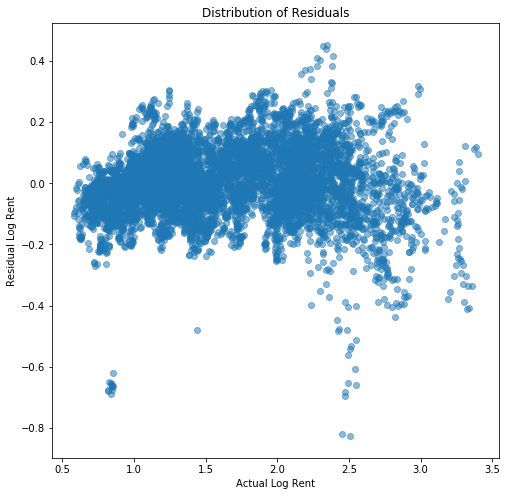

In [186]:
res_x = [target/1000 for target in expo(y)]
res_y = [(target - predict)/1000 for (target, predict) in zip(expo(y), expo(lm.predict(x)))]
plt.figure(figsize=(8,8))
plt.scatter(res_x, res_y, alpha = 0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Actual Log Rent')
plt.ylabel('Residual Log Rent')

In [154]:
# Instantiate, fit, predict
from sklearn.metrics import r2_score 


lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lm.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.92007544  0.00447115  0.00244269  0.00803097  0.03021565  0.08186842
 -0.18967717  0.0234416 ]
Mean squared error: 0.01
R_squared score: 0.95


In [85]:
train_set.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,LogValue
0,7.421776,2,6.350867,3.00000,0.026682,0.071471,0.053914,3.0,7.458763
2,7.036148,2,6.229107,2.17876,0.062797,0.155716,0.030479,3.0,7.101676
3,7.507690,2,6.965521,3.00000,0.043573,0.057157,0.028165,3.0,7.515345
4,6.858565,2,4.276235,2.10000,0.015401,0.009632,0.069657,5.0,6.800170
5,7.243513,2,5.445087,3.00000,0.192627,0.104966,0.067138,3.0,7.288244


In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and asian_pop")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'LogValue ~ asian_pop', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and asian_pop
                            OLS Regression Results                            
Dep. Variable:               LogValue   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3608.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:31:26   Log-Likelihood:                -5705.9
No. Observations:               16232   AIC:                         1.142e+04
Df Residuals:                   16230   BIC:                         1.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and income_per_capita")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'LogValue ~ LogValue_2015', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and income_per_capita
                            OLS Regression Results                            
Dep. Variable:               LogValue   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 3.450e+05
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:31:27   Log-Likelihood:                 17846.
No. Observations:               16232   AIC:                        -3.569e+04
Df Residuals:                   16230   BIC:                        -3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

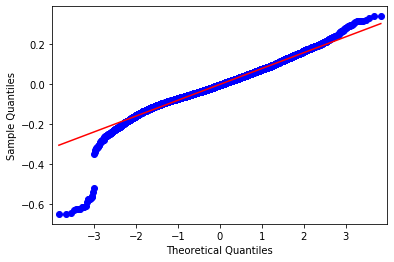

In [88]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

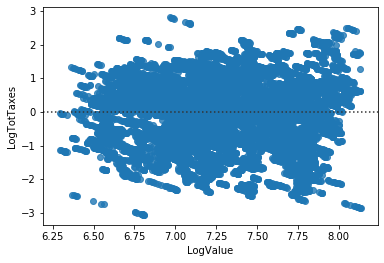

In [89]:
# simple plot of residuals
import seaborn as sns

sns.residplot('LogValue', 'LogTotTaxes', data=train_set)

In [90]:
train_set.columns

Index(['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
       'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank',
       'LogValue'],
      dtype='object')

In [91]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")
print (train_set.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (16232, 9) 

Column Headers: ['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'black_pop', 'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank', 'LogValue'] 

LogValue_2015                    float64
Season                             int64
LogTotTaxes                      float64
MortDeliq90                      float64
black_pop                        float64
asian_pop                        float64
vacant_housing_units_for_rent    float64
natural_amenity_rank             float64
LogValue                         float64
dtype: object


In [92]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train_set:
    # Find all the unique feature values
    uniq = train_set[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'LogValue_2015' has 2408 unique values
~~Listing up to 10 unique values~~
[7.42177579 7.03614849 7.50769008 6.85856503 7.24351297 7.53689713
 7.27378632 7.03262426 8.08425411 7.30114781]

-----------------------------------------------------------------------

'Season' has 4 unique values
[2 4 3 1]

-----------------------------------------------------------------------

'LogTotTaxes' has 1454 unique values
~~Listing up to 10 unique values~~
[6.35086727 6.22910712 6.96552063 4.27623545 5.44508714 5.06574688
 4.5592508  5.18651449 7.07649258 5.31612566]

-----------------------------------------------------------------------

'MortDeliq90' has 57 unique values
~~Listing up to 10 unique values~~
[3.        2.1787599 2.1       4.3       5.8       1.1       0.7
 4.2       1.6       1.       ]

-----------------------------------------------------------------------

'black_pop' has 1454 unique values
~~Listing up to 10 unique values~~
[0.02668229 0.06279733 0.04357

In [93]:
# Check for duplicate index or rows
idsUnique = len(set(train_set.index))
idsTotal = train_set.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 16232 total entries


In [94]:
#get summary of numerical variables
train_set.describe()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,LogValue
count,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000,16232.000000
mean,7.208741,2.334216,5.295491,2.091439,0.158088,0.080139,0.057343,4.132701,7.299328
std,0.387965,0.944843,1.076202,1.012056,0.198060,0.094996,0.033667,1.485936,0.380214
min,6.139885,1.000000,1.474761,0.200000,0.000617,0.000000,0.000000,1.000000,6.293419
25%,6.905753,2.000000,4.596455,1.300000,0.030026,0.021260,0.033852,3.000000,7.033506
50%,7.199678,2.000000,5.332099,2.000000,0.079847,0.047343,0.050270,3.000000,7.282761
75%,7.529943,3.000000,6.051938,2.700000,0.197638,0.098698,0.074316,5.000000,7.630947
max,8.137396,4.000000,8.892779,5.900000,0.979294,0.732625,0.551905,7.000000,8.137103


In [95]:
# Skewness of the distribution

print(train_set.skew())

# Values close to 0 show less skew


LogValue_2015                    0.014384
Season                           0.491692
LogTotTaxes                     -0.059441
MortDeliq90                      0.719880
black_pop                        2.134712
asian_pop                        2.582877
vacant_housing_units_for_rent    1.655883
natural_amenity_rank             0.778618
LogValue                        -0.120789
dtype: float64


In [96]:
# Skewness of the distribution

print(train_set.kurt())

LogValue_2015                   -0.837687
Season                          -0.659531
LogTotTaxes                     -0.046049
MortDeliq90                      0.224270
black_pop                        4.410282
asian_pop                        8.395329
vacant_housing_units_for_rent    8.125925
natural_amenity_rank            -0.752082
LogValue                        -0.786163
dtype: float64


In [97]:
#Check when a value in a cloumn is zero
train_set[(train_set['LogValue'] == 0)].count()

LogValue_2015                    0
Season                           0
LogTotTaxes                      0
MortDeliq90                      0
black_pop                        0
asian_pop                        0
vacant_housing_units_for_rent    0
natural_amenity_rank             0
LogValue                         0
dtype: int64

In [100]:
df = train_set[['LogTotTaxes','LogValue']]


In [101]:
df.head()


,LogTotTaxes,LogValue
0,6.350867,7.458763
2,6.229107,7.101676
3,6.965521,7.515345
4,4.276235,6.800170
5,5.445087,7.288244


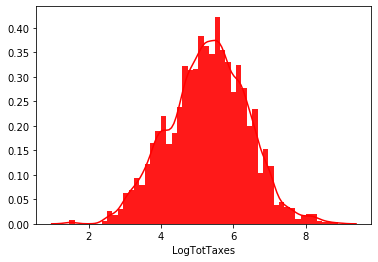

In [103]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['LogTotTaxes'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

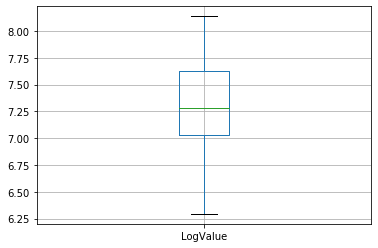

In [104]:
train_set.boxplot(column="LogValue")
#sns.boxplot(x='value', y='Year', data=train_set)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


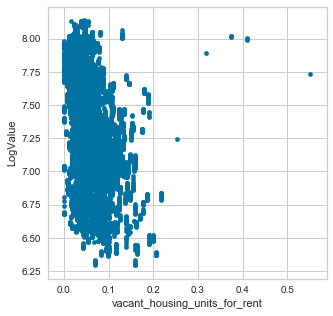

In [125]:
train_set.plot(kind="scatter",     # Create a scatterplot
              x='vacant_housing_units_for_rent',          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5))

In [133]:
train_set.columns

Index(['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
       'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank',
       'LogValue'],
      dtype='object')

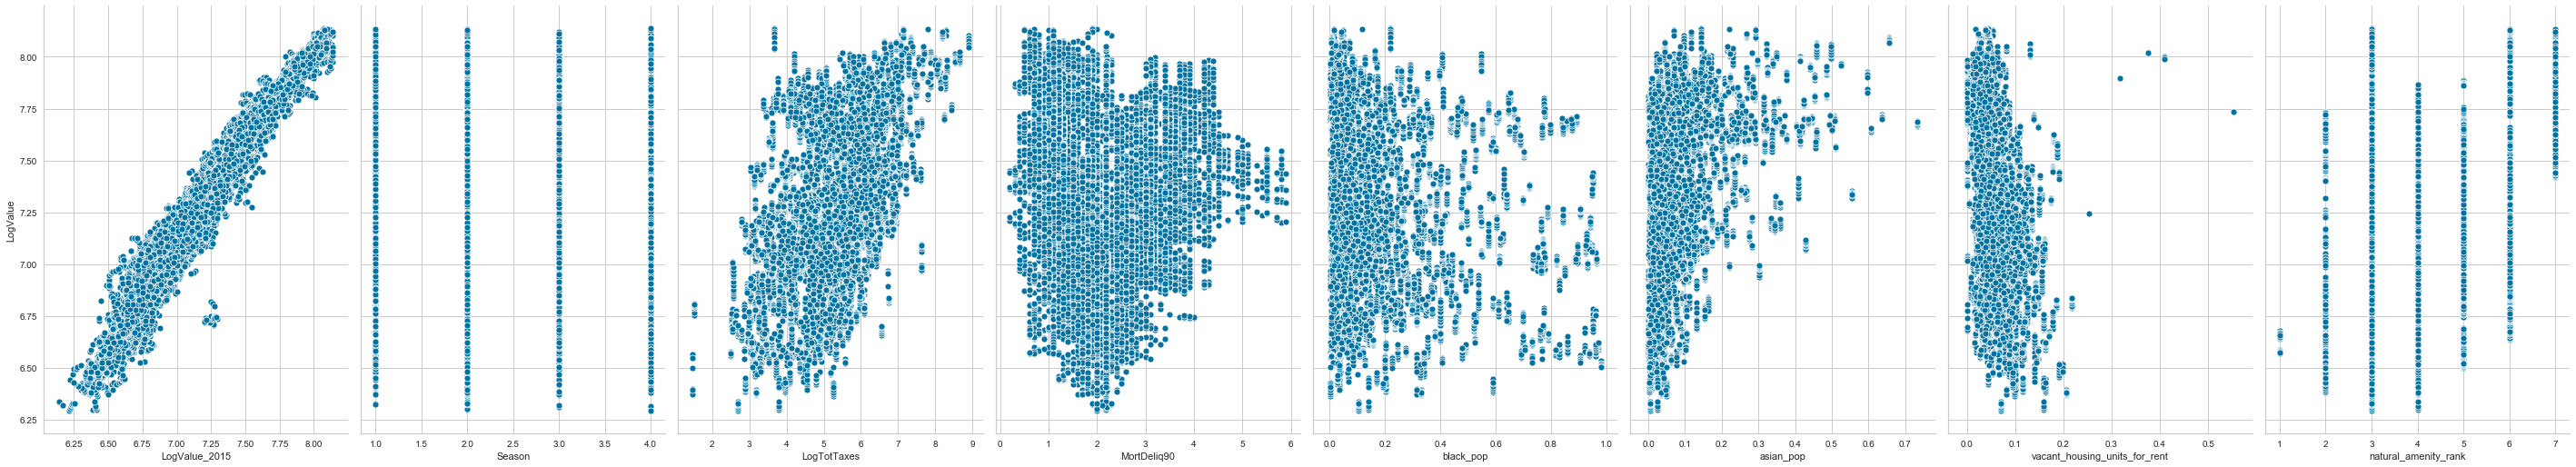

In [134]:
p = sns.pairplot(train_set, x_vars=['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
       'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank'], y_vars='LogValue', height=7, aspect=0.7)

In [135]:
#load_ext rpy2.ipython

In [130]:
%%R -i X -i y
a
lin_reg <- lm(LogValue ~ ., data = train_set)
summary(lin_reg)

UsageError: Cell magic `%%R` not found.


In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [165]:
gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 1000, 
            learning_rate = .3, #.3,
            max_depth = 3, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

--------------------------------------------------
The train set R^2 is 0.998
The test set R^2 is 0.954


In [166]:
#Random Forrest
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

randomForest.set_params(random_state=42, max_depth = 8, min_samples_split = 2, n_estimators=100, max_features =4)

print(randomForest.fit(X_train,y_train))


print(randomForest.score(X_train,y_train))
randomForest.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
0.9875462702711786


0.9664635671692445

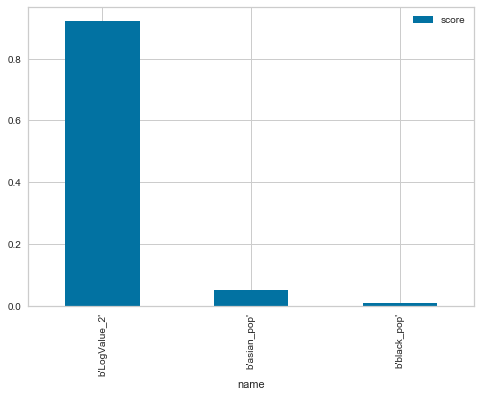

In [167]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


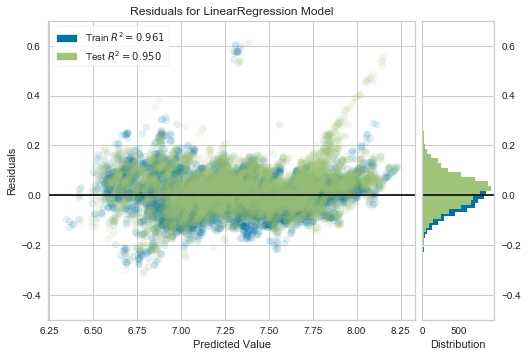

In [187]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lm, train_alpha = 0.1, test_alpha =0.1)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate ttrain_alpha = 0.1, test_alpha =0.01he model on the test data
plt.ylim([-0.5, 0.7])
visualizer.show()                 # Finalize and render the figure